# Chapter 9: Classification and Regression Trees

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

In [31]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import classificationSummary, regressionSummary
from sklearn.tree import export_graphviz 
from sklearn import tree

## Figure 9.7

Classes: Nonowner, Owner


[Text(139.5, 203.85000000000002, 'Income <= 59.7\ngini = 0.5\nsamples = 24\nvalue = [12, 12]\nclass = Nonowner'),
 Text(69.75, 67.94999999999999, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Nonowner'),
 Text(209.25, 67.94999999999999, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]\nclass = Owner')]

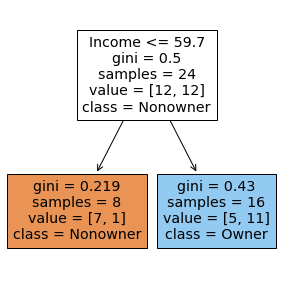

In [32]:
mower_df = pd.read_csv('RidingMowers.csv')

classTree = tree.DecisionTreeClassifier(random_state=0, max_depth=1)
clf = classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

print("Classes: {}".format(', '.join(classTree.classes_)))
plt.figure(figsize = (5,5))
tree.plot_tree(clf, feature_names=mower_df.columns[:2], class_names=classTree.classes_, filled = True)

The order of the `values` vector in the boxes is the same as `classTree.classes_`.

## Figure 9.8
Grow tree fully

Classes: Nonowner, Owner


[Text(223.2, 391.392, 'Income <= 59.7\ngini = 0.5\nsamples = 24\nvalue = [12, 12]\nclass = Nonowner'),
 Text(111.6, 304.416, 'Lot_Size <= 21.4\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Nonowner'),
 Text(55.8, 217.44, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Nonowner'),
 Text(167.39999999999998, 217.44, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Owner'),
 Text(334.79999999999995, 304.416, 'Lot_Size <= 19.8\ngini = 0.43\nsamples = 16\nvalue = [5, 11]\nclass = Owner'),
 Text(279.0, 217.44, 'Income <= 84.75\ngini = 0.494\nsamples = 9\nvalue = [5, 4]\nclass = Nonowner'),
 Text(223.2, 130.464, 'Income <= 61.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = Nonowner'),
 Text(167.39999999999998, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Owner'),
 Text(279.0, 43.488, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Nonowner'),
 Text(334.79999999999995, 130.464, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Owner'),
 Text(390.59999999999997, 217

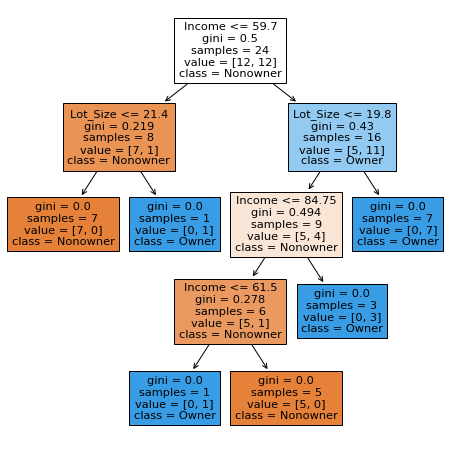

In [33]:
classTree = tree.DecisionTreeClassifier(random_state=0)
clf = classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

plt.figure(figsize = (8,8))
print("Classes: {}".format(', '.join(classTree.classes_)))
tree.plot_tree(clf, feature_names=mower_df.columns[:2], class_names=classTree.classes_, filled = True)

## Figure 9.10

[Text(2088.2981927710844, 3632.2363636363634, 'Income <= 110.5\ngini = 0.173\nsamples = 3000\nvalue = [2713, 287]'),
 Text(1000.0301204819277, 3286.3090909090906, 'CCAvg <= 2.95\ngini = 0.031\nsamples = 2363\nvalue = [2326, 37]'),
 Text(188.24096385542168, 2940.381818181818, 'Income <= 106.5\ngini = 0.002\nsamples = 2204\nvalue = [2202, 2]'),
 Text(94.12048192771084, 2594.454545454545, 'gini = 0.0\nsamples = 2188\nvalue = [2188, 0]'),
 Text(282.3614457831325, 2594.454545454545, 'Family <= 3.5\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(188.24096385542168, 2248.5272727272722, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(376.48192771084337, 2248.5272727272722, 'Experience <= 12.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(282.3614457831325, 1902.5999999999997, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(470.6024096385542, 1902.5999999999997, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(1811.8192771084337, 2940.381818181818, 'CD Account <= 0.5\ngini = 0.

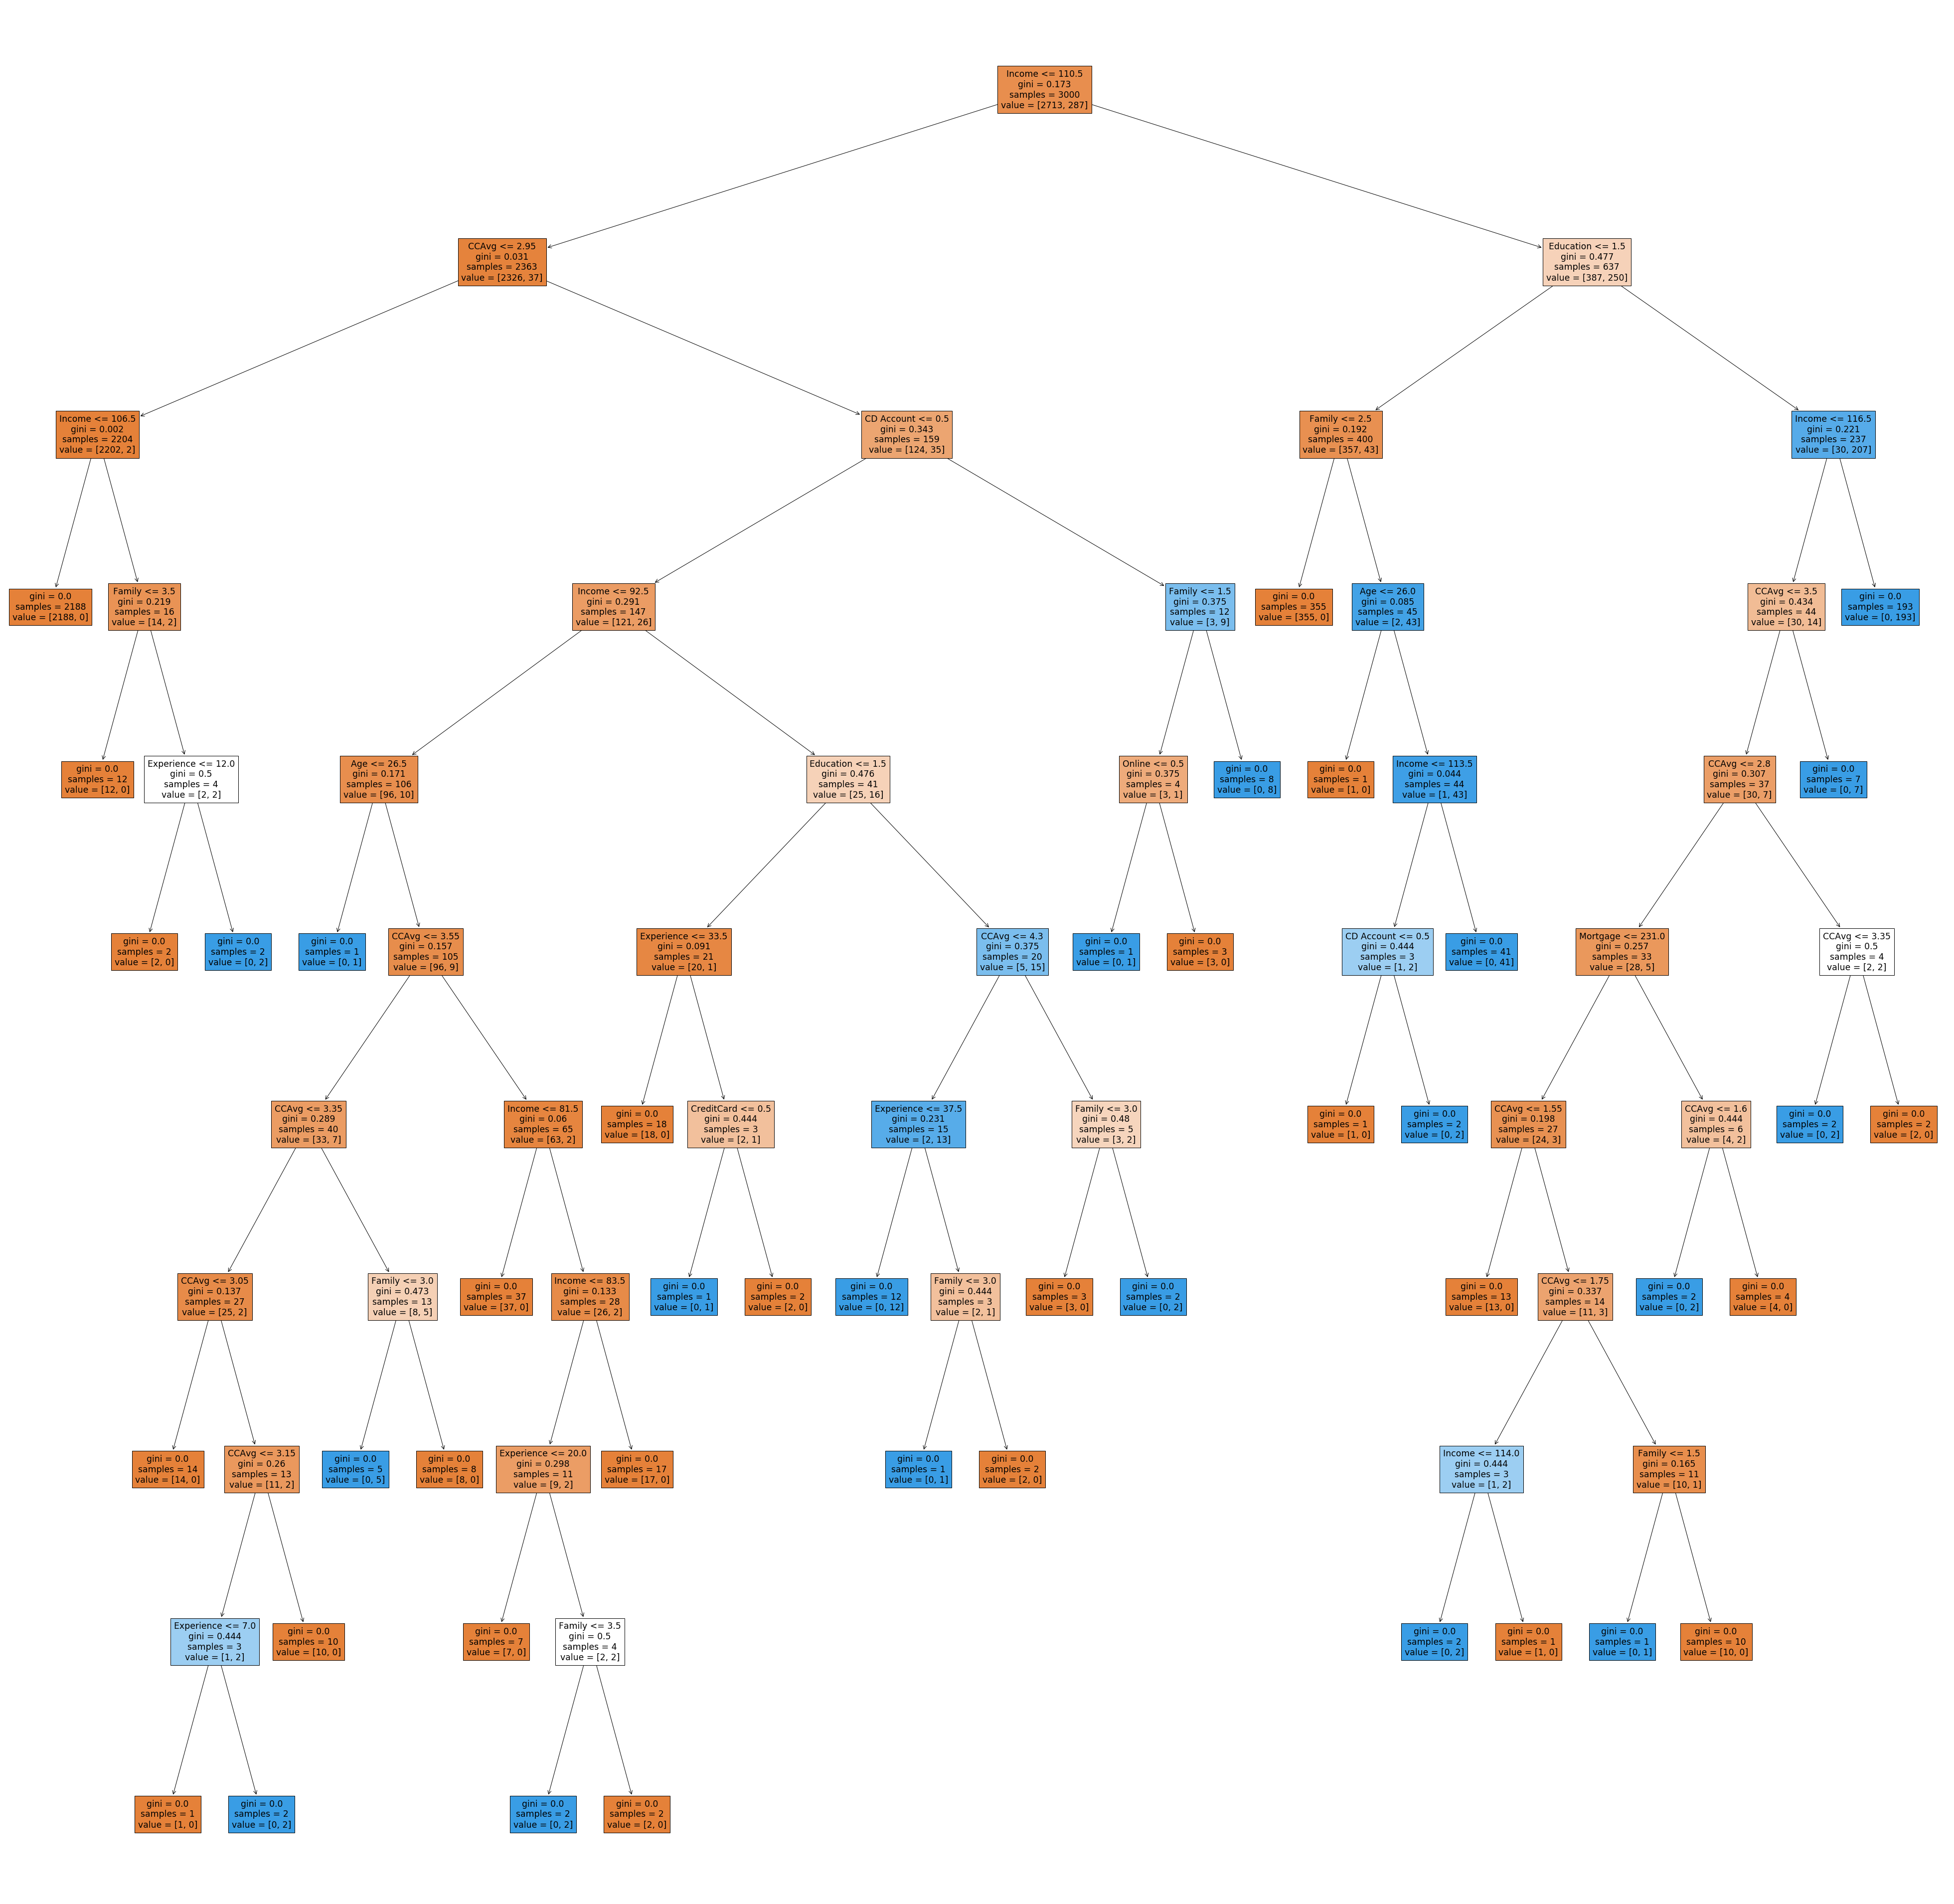

In [34]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

fullClassTree = tree.DecisionTreeClassifier()
full_clf = fullClassTree.fit(train_X, train_y)
plt.figure(figsize = (70,70))
tree.plot_tree(full_clf, feature_names=train_X.columns, filled = True)

## Table 9.3
<!-- <div class='alert alert-danger'>R output for reference - remove once missing metrics are available.
```
> confusionMatrix(default.ct.point.pred.train, train.df$Personal.Loan)
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2696   26
         1   13  265
                                          
               Accuracy : 0.987           
                 95% CI : (0.9823, 0.9907)
    No Information Rate : 0.903           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9243          
 Mcnemar's Test P-Value : 0.05466         
                                          
            Sensitivity : 0.9952          
            Specificity : 0.9107          
         Pos Pred Value : 0.9904          
         Neg Pred Value : 0.9532          
             Prevalence : 0.9030          
         Detection Rate : 0.8987          
   Detection Prevalence : 0.9073          
      Balanced Accuracy : 0.9529          
                                          
       'Positive' Class : 0               
```
</div>-->

In [35]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287
Confusion Matrix (Accuracy 0.9795)

       Prediction
Actual    0    1
     0 1792   15
     1   26  167


## Table 9.4

In [36]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = tree.DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.988', '0.972', '0.995', '0.985', '0.993']
Accuracy: 0.987 (+/- 0.017)
Accuracy: 0.987 (+/- 0.008)


## Figure 9.12

[Text(167.39999999999998, 380.52, 'Income <= 110.5\ngini = 0.173\nsamples = 3000\nvalue = [2713, 287]'),
 Text(111.6, 271.8, 'gini = 0.031\nsamples = 2363\nvalue = [2326, 37]'),
 Text(223.2, 271.8, 'Education <= 1.5\ngini = 0.477\nsamples = 637\nvalue = [387, 250]'),
 Text(111.6, 163.07999999999998, 'Family <= 2.5\ngini = 0.192\nsamples = 400\nvalue = [357, 43]'),
 Text(55.8, 54.360000000000014, 'gini = 0.0\nsamples = 355\nvalue = [355, 0]'),
 Text(167.39999999999998, 54.360000000000014, 'gini = 0.085\nsamples = 45\nvalue = [2, 43]'),
 Text(334.79999999999995, 163.07999999999998, 'Income <= 116.5\ngini = 0.221\nsamples = 237\nvalue = [30, 207]'),
 Text(279.0, 54.360000000000014, 'gini = 0.434\nsamples = 44\nvalue = [30, 14]'),
 Text(390.59999999999997, 54.360000000000014, 'gini = 0.0\nsamples = 193\nvalue = [0, 193]')]

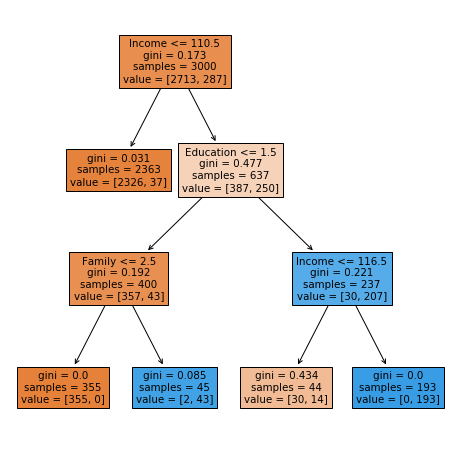

In [37]:
smallClassTree = tree.DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

plt.figure(figsize = (8,8))
tree.plot_tree(smallClassTree, feature_names=train_X.columns, filled = True)

## Table 9.5

In [38]:
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9823)

       Prediction
Actual    0    1
     0 2711    2
     1   51  236
Confusion Matrix (Accuracy 0.9770)

       Prediction
Actual    0    1
     0 1804    3
     1   43  150


## Grid search

## Table 9.6

In [39]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.9876666666666667
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}
Improved score:  0.9873333333333333
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0011, 'min_samples_split': 13}


[Text(472.15384615384613, 733.86, 'Income <= 110.5\ngini = 0.173\nsamples = 3000\nvalue = [2713, 287]'),
 Text(171.69230769230768, 570.78, 'CCAvg <= 2.95\ngini = 0.031\nsamples = 2363\nvalue = [2326, 37]'),
 Text(85.84615384615384, 407.70000000000005, 'gini = 0.002\nsamples = 2204\nvalue = [2202, 2]'),
 Text(257.53846153846155, 407.70000000000005, 'CD Account <= 0.5\ngini = 0.343\nsamples = 159\nvalue = [124, 35]'),
 Text(171.69230769230768, 244.62, 'Income <= 92.5\ngini = 0.291\nsamples = 147\nvalue = [121, 26]'),
 Text(85.84615384615384, 81.54000000000008, 'gini = 0.171\nsamples = 106\nvalue = [96, 10]'),
 Text(257.53846153846155, 81.54000000000008, 'gini = 0.476\nsamples = 41\nvalue = [25, 16]'),
 Text(343.38461538461536, 244.62, 'gini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(772.6153846153845, 570.78, 'Education <= 1.5\ngini = 0.477\nsamples = 637\nvalue = [387, 250]'),
 Text(600.9230769230769, 407.70000000000005, 'Family <= 2.5\ngini = 0.192\nsamples = 400\nvalue = [357, 43]

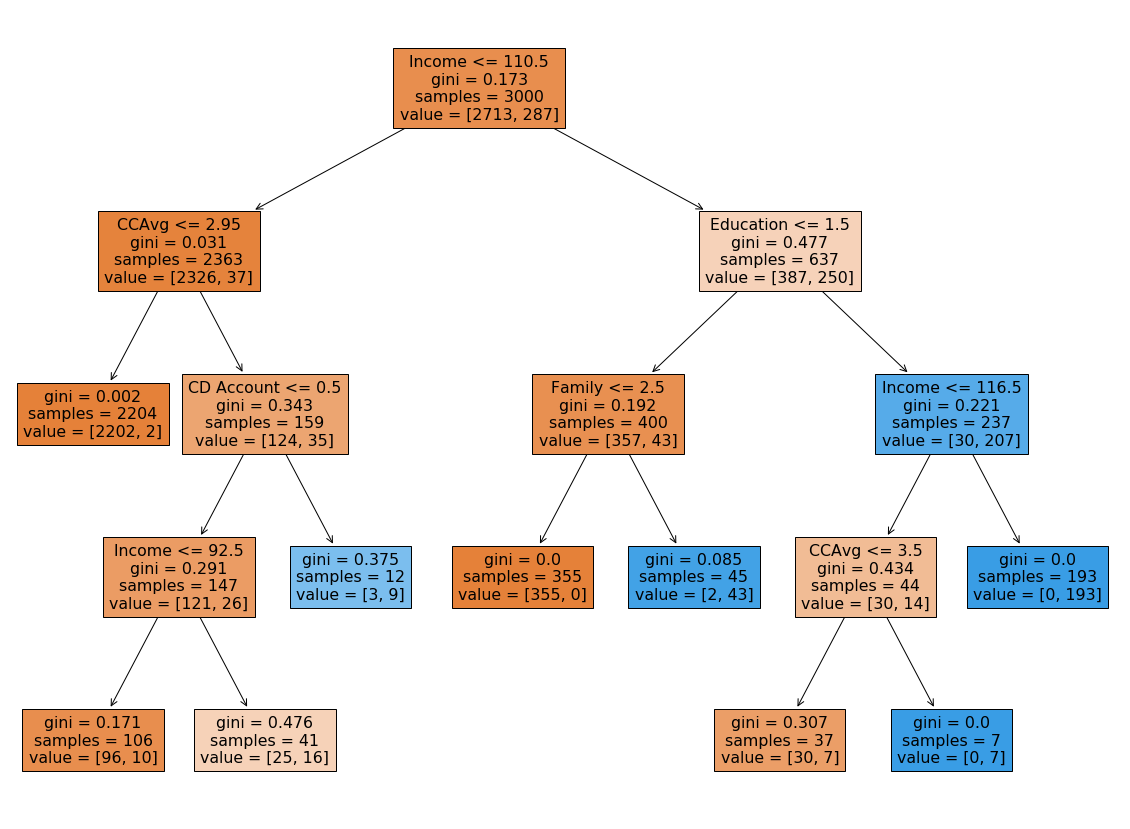

In [40]:
plt.figure(figsize = (20, 15))
tree.plot_tree(bestClassTree, feature_names=train_X.columns, filled = True)

In [41]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9867)

       Prediction
Actual    0    1
     0 2708    5
     1   35  252
Confusion Matrix (Accuracy 0.9815)

       Prediction
Actual    0    1
     0 1801    6
     1   31  162


## Figure 9.16

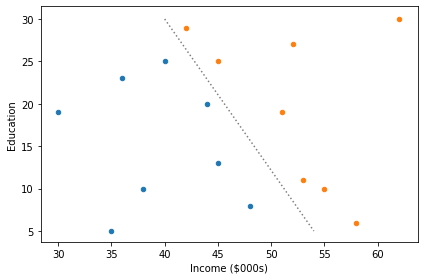

In [42]:
fakeScatter = pd.DataFrame([
    (30, 19, 1), (35, 5, 1), (40, 25, 1), (45, 13, 1), 
    (38, 10, 1), (36, 23, 1), (48, 8, 1), (44, 20, 1), (50, 12),
    (51, 19, 0), (62, 30, 0), (42, 29, 0), (45, 25, 0), 
    (55, 10, 0), (52, 27, 0), (58, 6, 0), (53, 11, 0), 
], columns=['x', 'y', 'category'])
ax = fakeScatter.loc[fakeScatter.category==1,:].plot.scatter(x='x', y='y', color='C0')
fakeScatter.loc[fakeScatter.category==0,:].plot.scatter(x='x', y='y', ax=ax, color='C1')
plt.plot((40, 54), (30, 5), ':', color='grey')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Education')

plt.tight_layout()
plt.show()

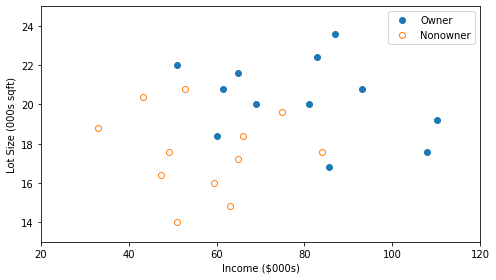

In [43]:
def basePlot(ax):
    mower_df.loc[mower_df.Ownership=='Owner'].plot(x='Income', y='Lot_Size', style='o', 
                                                   markerfacecolor='C0', markeredgecolor='C0',
                                                   ax=ax)
    mower_df.loc[mower_df.Ownership=='Nonowner'].plot(x='Income', y='Lot_Size', style='o',
                                                      markerfacecolor='none', markeredgecolor='C1',
                                                      ax=ax)
    ax.legend(["Owner", "Nonowner"]);
    ax.set_xlim(20, 120)
    ax.set_ylim(13, 25)
    ax.set_xlabel('Income ($000s)')
    ax.set_ylabel('Lot Size (000s sqft)')
    return ax

fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
plt.tight_layout()
plt.show()

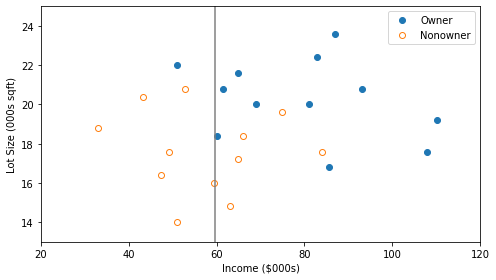

In [44]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
ax.plot((x0, x0), (25, 13), color='grey')
plt.tight_layout()
plt.show()

[Text(139.5, 203.85000000000002, 'Income <= 59.7\ngini = 0.5\nsamples = 24\nvalue = [12, 12]\nclass = Nonowner'),
 Text(69.75, 67.94999999999999, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Nonowner'),
 Text(209.25, 67.94999999999999, 'gini = 0.43\nsamples = 16\nvalue = [5, 11]\nclass = Owner')]

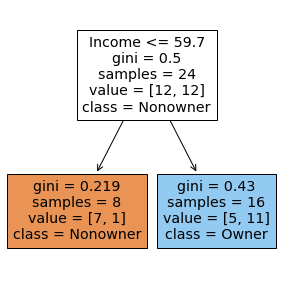

In [45]:
classTree = tree.DecisionTreeClassifier(random_state=0, max_depth=1)
clf = classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
plt.figure(figsize = (5,5))
tree.plot_tree(clf, feature_names=mower_df.columns[:2], class_names=classTree.classes_, filled = True)

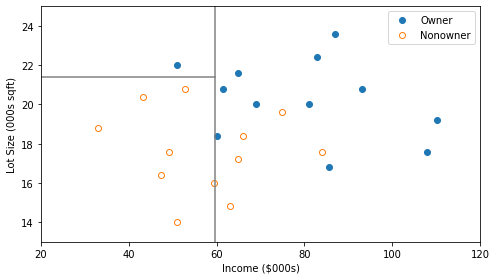

In [46]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
plt.tight_layout()
plt.show()

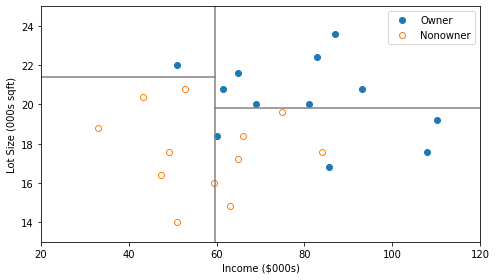

In [47]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
y2 = 19.8
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
ax.plot((x0, 120), (y2, y2), color='grey')
plt.tight_layout()
plt.show()

[Text(195.3, 317.09999999999997, 'Income <= 59.7\ngini = 0.5\nsamples = 24\nvalue = [12, 12]\nclass = Nonowner'),
 Text(97.65, 190.26, 'Lot_Size <= 21.4\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Nonowner'),
 Text(48.825, 63.420000000000016, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Nonowner'),
 Text(146.47500000000002, 63.420000000000016, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Owner'),
 Text(292.95000000000005, 190.26, 'Lot_Size <= 19.8\ngini = 0.43\nsamples = 16\nvalue = [5, 11]\nclass = Owner'),
 Text(244.125, 63.420000000000016, 'gini = 0.494\nsamples = 9\nvalue = [5, 4]\nclass = Nonowner'),
 Text(341.77500000000003, 63.420000000000016, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Owner')]

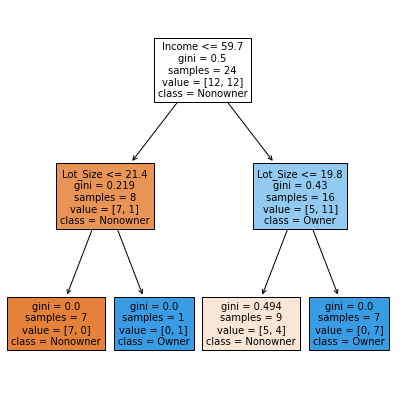

In [48]:
classTree = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
clf = classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
plt.figure(figsize = (7, 7))
tree.plot_tree(clf, feature_names=mower_df.columns[:2], class_names=classTree.classes_, filled = True)

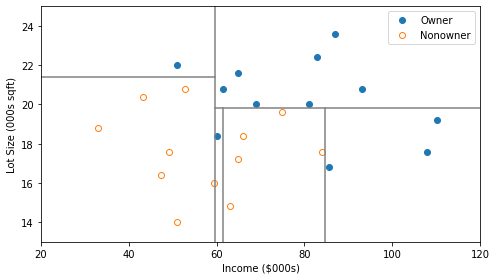

In [49]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
y2 = 19.8
x3 = 84.75
x4 = 61.5
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
ax.plot((x0, 120), (y2, y2), color='grey')
ax.plot((x3, x3), (13, y2), color='grey')
ax.plot((x4, x4), (13, y2), color='grey')
plt.tight_layout()
plt.show()

[Text(251.10000000000002, 342.46799999999996, 'Income <= 59.7\ngini = 0.5\nsamples = 24\nvalue = [12, 12]\nclass = Nonowner'),
 Text(125.55000000000001, 266.364, 'Lot_Size <= 21.4\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Nonowner'),
 Text(62.775000000000006, 190.26, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Nonowner'),
 Text(188.32500000000002, 190.26, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Owner'),
 Text(376.65000000000003, 266.364, 'Lot_Size <= 19.8\ngini = 0.43\nsamples = 16\nvalue = [5, 11]\nclass = Owner'),
 Text(313.875, 190.26, 'Income <= 84.75\ngini = 0.494\nsamples = 9\nvalue = [5, 4]\nclass = Nonowner'),
 Text(251.10000000000002, 114.156, 'Income <= 61.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = Nonowner'),
 Text(188.32500000000002, 38.051999999999964, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Owner'),
 Text(313.875, 38.051999999999964, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Nonowner'),
 Text(376.65000000000003, 114.1

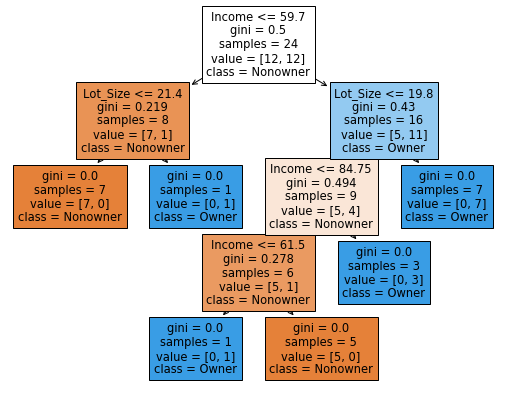

In [50]:
classTree = tree.DecisionTreeClassifier(random_state=0)
clf = classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
plt.figure(figsize = (9, 7))
tree.plot_tree(clf, feature_names=mower_df.columns[:2], class_names=classTree.classes_, filled = True)

## Information about full decision tree

In [51]:
tree = fullClassTree
print('Number of nodes', tree.tree_.node_count)

Number of nodes 85


In [52]:
estimator = tree
# Using those arrays, we can parse the tree structure:

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold
value = estimator.tree_.value


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

from collections import Counter
nodeClassCounter = Counter()
terminal_leaves = 0
for i in range(n_nodes):
    if is_leaves[i]:
        terminal_leaves = terminal_leaves + 1
        nodeClassCounter.update([np.argmax(value[i][0])])
print()
print('Number of terminal leaves', terminal_leaves)
print(nodeClassCounter)


Number of terminal leaves 43
Counter({0: 24, 1: 19})


## Regression Trees : Table 9.7 and Figure 9.14

In [53]:
toyotaCorolla_df = pd.read_csv('ToyotaCorolla.csv').iloc[:1000,:]
toyotaCorolla_df = toyotaCorolla_df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

predictors = ['Age', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Tax', 'Weight']
outcome = 'Price'

X = pd.get_dummies(toyotaCorolla_df[predictors], drop_first=True)
y = toyotaCorolla_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 16}


In [54]:
regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1058.8202
            Mean Absolute Error (MAE) : 767.7203
          Mean Percentage Error (MPE) : -0.8074
Mean Absolute Percentage Error (MAPE) : 6.8325

Regression statistics

                      Mean Error (ME) : 60.5241
       Root Mean Squared Error (RMSE) : 1554.9146
            Mean Absolute Error (MAE) : 1026.3487
          Mean Percentage Error (MPE) : -1.3082
Mean Absolute Percentage Error (MAPE) : 9.2311


In [55]:
export_graphviz(regTree, feature_names=train_X.columns)


'digraph Tree {\nnode [shape=box] ;\n0 [label="Age <= 31.5\\nmse = 13668066.556\\nsamples = 600\\nvalue = 11777.812"] ;\n1 [label="Weight <= 1127.5\\nmse = 9175563.513\\nsamples = 105\\nvalue = 18387.171"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Age <= 12.5\\nmse = 2733533.402\\nsamples = 57\\nvalue = 16789.702"] ;\n1 -> 2 ;\n3 [label="mse = 863765.972\\nsamples = 12\\nvalue = 18809.167"] ;\n2 -> 3 ;\n4 [label="HP <= 103.5\\nmse = 1854599.702\\nsamples = 45\\nvalue = 16251.178"] ;\n2 -> 4 ;\n5 [label="Age <= 21.0\\nmse = 1575917.18\\nsamples = 27\\nvalue = 15759.926"] ;\n4 -> 5 ;\n6 [label="mse = 502278.222\\nsamples = 12\\nvalue = 16580.667"] ;\n5 -> 6 ;\n7 [label="mse = 1464822.222\\nsamples = 15\\nvalue = 15103.333"] ;\n5 -> 7 ;\n8 [label="KM <= 24329.5\\nmse = 1367642.052\\nsamples = 18\\nvalue = 16988.056"] ;\n4 -> 8 ;\n9 [label="mse = 277336.0\\nsamples = 5\\nvalue = 18678.0"] ;\n8 -> 9 ;\n10 [label="mse = 266090.533\\nsamples = 13\\nvalue = 16

In [56]:
export_graphviz(regTree, feature_names=train_X.columns, rotate=True)

'digraph Tree {\nnode [shape=box] ;\nrankdir=LR ;\n0 [label="Age <= 31.5\\nmse = 13668066.556\\nsamples = 600\\nvalue = 11777.812"] ;\n1 [label="Weight <= 1127.5\\nmse = 9175563.513\\nsamples = 105\\nvalue = 18387.171"] ;\n0 -> 1 [labeldistance=2.5, labelangle=-45, headlabel="True"] ;\n2 [label="Age <= 12.5\\nmse = 2733533.402\\nsamples = 57\\nvalue = 16789.702"] ;\n1 -> 2 ;\n3 [label="mse = 863765.972\\nsamples = 12\\nvalue = 18809.167"] ;\n2 -> 3 ;\n4 [label="HP <= 103.5\\nmse = 1854599.702\\nsamples = 45\\nvalue = 16251.178"] ;\n2 -> 4 ;\n5 [label="Age <= 21.0\\nmse = 1575917.18\\nsamples = 27\\nvalue = 15759.926"] ;\n4 -> 5 ;\n6 [label="mse = 502278.222\\nsamples = 12\\nvalue = 16580.667"] ;\n5 -> 6 ;\n7 [label="mse = 1464822.222\\nsamples = 15\\nvalue = 15103.333"] ;\n5 -> 7 ;\n8 [label="KM <= 24329.5\\nmse = 1367642.052\\nsamples = 18\\nvalue = 16988.056"] ;\n4 -> 8 ;\n9 [label="mse = 277336.0\\nsamples = 5\\nvalue = 18678.0"] ;\n8 -> 9 ;\n10 [label="mse = 266090.533\\nsamples = 

## Figure 9.15 (no longer used)

In [57]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

Variable importance plot

               feature  importance       std
7   Securities Account    0.003964  0.004998
9               Online    0.006394  0.005350
10          CreditCard    0.007678  0.007053
6             Mortgage    0.034243  0.023469
1           Experience    0.035539  0.016061
0                  Age    0.036258  0.015858
8           CD Account    0.057917  0.043185
3               Family    0.111375  0.053146
4                CCAvg    0.172105  0.103011
5            Education    0.200772  0.101002
2               Income    0.333756  0.129227


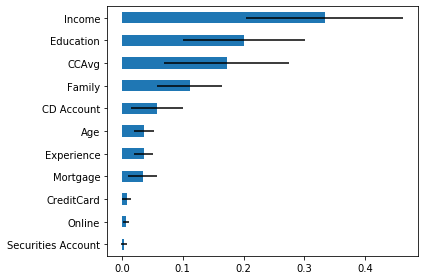

In [58]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

Confusion matrix and metrics

In [59]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.9820)

       Prediction
Actual    0    1
     0 1803    4
     1   32  161


## Table 9.5

In [60]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.9835)

       Prediction
Actual    0    1
     0 1799    8
     1   25  168
